### Exercise 5.3

U :
   0.70711  -0.70711
   0.70711   0.70711
S :
Diagonal Matrix

   14.1421         0
         0    7.0711
VT :
  -0.60000   0.80000
  -0.80000  -0.60000
Singular values :
   14.1421
    7.0711
Left singular vectors as column vectors :
   0.70711  -0.70711
   0.70711   0.70711
Right singular vectors as column vectors :
  -0.60000  -0.80000
   0.80000  -0.60000
1-norm :
 16
2-norm :
 14.142
Inf-norm :
 9
Frobenius-norm :
 15.811
A inverse :
   0.050000  -0.110000
   0.100000  -0.020000
Eigenvalues of A :
   1.5000 + 9.8869i
   1.5000 - 9.8869i
Eigenvalue product equals to determinant
Singular value product equals to absolute value of determinant
Area of ellipse :
 314.16


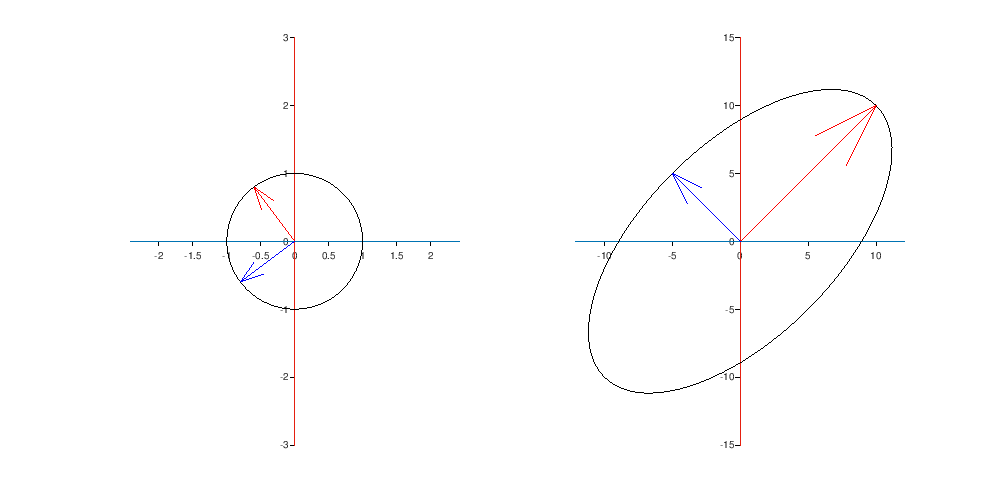

In [2]:
# Part a
A = [-2 11; -10 5];
B = A*A';
# find the eigenvalues
eig = roots([1, -(B(1)+B(4)), (B(1)*B(4)-B(2)*B(3))]);
eig = sort(eig, mode="descend");
# find the eigenvectors
x1 = null(B - diag([eig(1) eig(1)]));
x2 = null(B - diag([eig(2) eig(2)]));
# construct U and Sigma matrices
S = diag([sqrt(eig(1)) sqrt(eig(2))]);
U = [x1 x2];
# find the columns of V
v1 = linsolve(A, S(1)*U(:, 1));
v2 = linsolve(A, S(4)*U(:, 2));
V = [v1 v2];
VT = V';
disp("U :"), disp(U);
disp("S :"), disp(S);
disp("VT :"), disp(VT);
# singular values
disp("Singular values :"), disp(diag(S));
disp("Left singular vectors as column vectors :"), disp(U);
disp("Right singular vectors as column vectors :"), disp(V);

# Part b
# create unit sphere
t = linspace(0, 2*pi, 100)';
x = cos(t);
y = sin(t);
# find image of unit sphere under A
comb = horzcat(x, y);
for i = 1:size(x)
	comb(i,:) = (A*comb(i,:)')';
endfor
# give aliases to singular values/vectors
v1 = V(:,1);
v2 = V(:,2);
sigma1 = S(1);
sigma2 = S(4);
u1 = U(:,1);
u2 = U(:,2);

# plot unit sphere and right singular vectors of A
figure('Position', [0 0 1000 500]);
subplot(1, 2, 1);
plot(x, y, "color", "Black");
hold on;
quiver(0, 0, v1(1), v1(2), "color", "Red");
quiver(0, 0, v2(1), v2(2), "color", "Blue");
xlim([-3, 3]);
ylim([-3, 3]);
axis equal;
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
set(gca, "box", "off");

# plot hyperellipse and left singular vectors multiplied with singular values
# which are the images of the corresponding right singular vectors
# Av1 = s1u1
# Av2 = s2u2
subplot(1, 2, 2);
plot(comb(:,1), comb(:,2), "color", "Black");
hold on;
quiver(0, 0, sigma1*u1(1), sigma1*u1(2), "color", "Red");
quiver(0, 0, sigma2*u2(1), sigma2*u2(2), "color", "Blue");
xlim([-15, 15]);
ylim([-15, 15]);
axis equal;
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
set(gca, "box", "off");

# Part c
# 1-norm is max column sum
disp("1-norm :"), disp(max(sum(A(:,1)), sum(A(:, 2))));
# 2-norm is maximum singular value which by convention is sigma1
disp("2-norm :"), disp(sigma1);
# Inf-norm is max row sum
disp("Inf-norm :"), disp(max(sum(A(1,:)), sum(A(2,:))));
# Frobenius norm is Frobenius norm of diagonal Sigma
disp("Frobenius-norm :"), disp(sqrt(sum(diag(S).^2)))

# Part d
# Need to find the inverse of diagonal Sigma to find A_inv.
S_inv = diag(diag(S) .^ (-1));
A_inv = V*S_inv*U';
disp("A inverse :"), disp(A_inv);

# Part e
eig_A = roots([1, -(A(1)+A(4)), (A(1)*A(4)-A(2)*A(3))]);
disp("Eigenvalues of A :"), disp(eig_A);

# Part f
detA = det(A);
eps = 0.00000001;
if abs(detA - prod(eig_A)) < eps
	disp("Eigenvalue product equals to determinant");
else
	disp("Eigenvalue product isn't equal to determinant");
endif
if abs(abs(detA) - prod(eig_A)) < eps
	disp("Singular value product equals to absolute value of determinant");
else
	disp("Singular value product isn't equal to absolute value of determinant");
endif

# Part f
disp("Area of ellipse :"), disp(pi*sigma1*sigma2);